In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1636)

In [ ]:
def clamp(x, b):
    return np.clip(x, -b, b)

def laplace(shift = 0.0, scale = 1.0, size = None):
    return np.random.laplace(loc=shift, scale=scale, size=size)

def ols_regression(x, y):
    s_xy = np.sum(x * y)
    s_xx = np.sum(x ** 2)
    return s_xy / s_xx

def dp_ridge_regression(x, y, epsilon, b):
    s_xy_hat = np.sum(x * y) + laplace(scale = 4*b*b / epsilon)
    s_xx_hat = s_xx_hat = np.sum(x ** 2) + laplace(scale = 2*b*b / epsilon)
    while s_xx_hat == 0.:
        s_xx_hat = np.sum(x ** 2) + laplace(scale = 2*b*b / epsilon)
    return s_xy_hat / s_xx_hat

In [ ]:
epsilon, b = 0.1, 1
trials = 1000

true_sd, true_bias, dp_sd, dp_bias = [], [], [], []

for n in range(100, 5100, 100):
    slope = 1
    true_ols, dp_ols = [], []
    for _ in range(trials):
        x = np.random.uniform(-0.5, 0.5, n)
        y = clamp(slope * x + np.random.normal(loc=0., scale=0.02, size=n), 1)
        true_ols.append(ols_regression(x, y))
        dp_ols.append(dp_ridge_regression(x, y, epsilon, b))
    true_sd.append(np.std(true_ols))
    true_bias.append(np.mean(true_ols) - slope)
    dp_sd.append(np.std(dp_ols))
    dp_bias.append(np.mean(dp_ols) - slope)


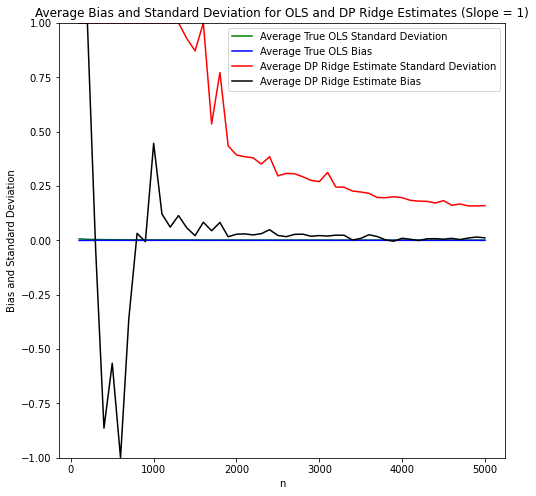

In [ ]:
plot_true_sd = clamp(true_sd, 1)
plot_true_bias = clamp(true_bias, 1)
plot_dp_sd = clamp(dp_sd, 1)
plot_dp_bias = clamp(dp_bias, 1)

plt.figure(figsize=(8, 8))

plt.plot(list(range(100, 5001, 100)), plot_true_sd, color="green", label="Average True OLS Standard Deviation")
plt.plot(list(range(100, 5001, 100)), plot_true_bias, color="blue", label="Average True OLS Bias")
plt.plot(list(range(100, 5001, 100)), plot_dp_sd, color="red", label="Average DP Ridge Estimate Standard Deviation")
plt.plot(list(range(100, 5001, 100)), plot_dp_bias, color="black", label="Average DP Ridge Estimate Bias")

plt.xlabel("n")
plt.ylim(-1, 1)
plt.ylabel("Bias and Standard Deviation")
plt.title("Average Bias and Standard Deviation for OLS and DP Ridge Estimates (Slope = 1)")
plt.legend()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5d71c9c3-da98-48cf-bf84-cbaf5507821e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>